In [1]:
from pyiron_base import Project
from pyiron_base.project.delayed import DelayedObject
from python_workflow_definition.pyiron_base import load_workflow_json, _get_unique_objects, _get_connection_dict, _get_edges_dict
from python_workflow_definition.shared import (
    NODES_LABEL,
    EDGES_LABEL,
    VERSION_NUMBER,
    VERSION_LABEL,
    set_result_node,
    update_node_names,
    SOURCE_LABEL,
    SOURCE_PORT_LABEL,
    TARGET_LABEL,
    TARGET_PORT_LABEL,
)
import json
import numpy as np
from inspect import isfunction

# Clean up 

In [2]:
pr = Project(".")

In [3]:
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

# Load Workflow

In [4]:
workflow_json_filename = "workflow.json"

In [5]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
# delayed_object_lst[-1].draw()

# Run Workflow

In [6]:
def get_input_obj(obj):
    obj_lst = []
    for obj_in in obj.input.values():
        if isinstance(obj_in, DelayedObject):
            obj_lst += [obj_in]
            obj_lst += get_input_obj(obj=obj_in)
    return obj_lst

In [7]:
for d in get_input_obj(obj=delayed_object_lst[-1]):
    d.execute_in_working_directory = True

In [8]:
for d in get_input_obj(obj=delayed_object_lst[-1]):
    print(d.execute_in_working_directory)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


The job get_bulk_structure_2a7f41a00815f6bf9ba52bd8837bace5 was saved and received the ID: 1
The job get_dict_5aee89acb3a4017b05c39f7477a082f8 was saved and received the ID: 2
The job calculate_qe_8649213786bf31b0c67e1cc4640b5cee was saved and received the ID: 3


[jupyter-jan-janssen-pwd-qe-data-export-6rkpne0t:00828] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


The job generate_structures_aa9eefec014a7e6e914a92c504dd7f89 was saved and received the ID: 4
The job get_dict_1a380d1e5f9bc50687f308e95234eb2d was saved and received the ID: 5
The job calculate_qe_3af080cb07c4c844059670b44304d348 was saved and received the ID: 6


[jupyter-jan-janssen-pwd-qe-data-export-6rkpne0t:00847] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


The job get_dict_f73c80f668c377335072bc08b36144d2 was saved and received the ID: 7
The job calculate_qe_f666882d62ad2cdb137e450417ff3a84 was saved and received the ID: 8


[jupyter-jan-janssen-pwd-qe-data-export-6rkpne0t:00858] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


The job get_dict_917e84db390fb200b1c9d6178ed5474b was saved and received the ID: 9
The job calculate_qe_cd302d900d69c751326f536876446987 was saved and received the ID: 10


[jupyter-jan-janssen-pwd-qe-data-export-6rkpne0t:00869] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


The job get_dict_445a1d8889885785109ad6adcbe4a266 was saved and received the ID: 11
The job calculate_qe_4e127a09391d3c5d39ed087b39fd2a90 was saved and received the ID: 12


[jupyter-jan-janssen-pwd-qe-data-export-6rkpne0t:00881] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


The job get_dict_56ac5cef590aab2fb3585edb2cf191dc was saved and received the ID: 13
The job calculate_qe_792a06748b85a8e0ee60a2233767a00a was saved and received the ID: 14


[jupyter-jan-janssen-pwd-qe-data-export-6rkpne0t:00897] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


The job get_list_dd1e708529cb70f0f0eefc466c64e23f was saved and received the ID: 15
The job get_list_5679b715ef01955c72a7bb23f4ab2553 was saved and received the ID: 16
The job plot_energy_volume_curve_b9c6031606b2f84da86e024c70d918bc was saved and received the ID: 17


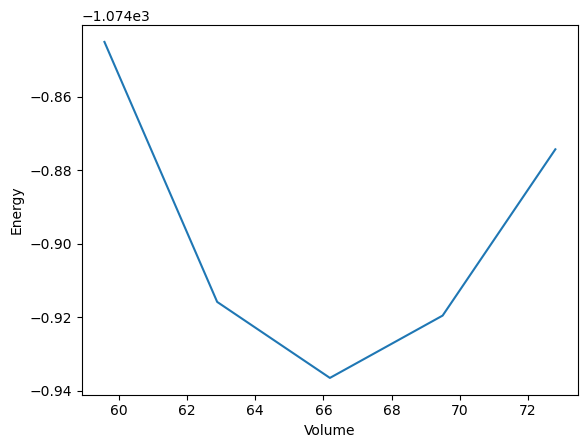

In [9]:
delayed_object_lst[-1].pull()

# Write Workflow with Output

In [24]:
def _remove_server_obj(nodes_dict: dict, edges_lst: list):
    server_lst = [k for k in nodes_dict.keys() if k.startswith("_server_obj_")]
    for s in server_lst:
        del nodes_dict[s]
        edges_lst = [ep for ep in edges_lst if s not in ep]
    return nodes_dict, edges_lst

In [25]:
def _get_nodes(connection_dict: dict, delayed_object_updated_dict: dict):
    return {
        connection_dict[k]: v._python_function if isinstance(v, DelayedObject) else v
        for k, v in delayed_object_updated_dict.items()
    }

In [26]:
def _get_working_directories(connection_dict: dict, delayed_object_updated_dict: dict):
    return {
        connection_dict[k]: v._job.working_directory 
        for k, v in delayed_object_updated_dict.items() if isinstance(v, DelayedObject)
    }

In [27]:
def _get_output(connection_dict: dict, delayed_object_updated_dict: dict):
    return {
        connection_dict[k]: v._job.output.to_builtin()["result"] 
        for k, v in delayed_object_updated_dict.items() if isinstance(v, DelayedObject)
    }

In [28]:
def update_node_names(workflow_dict: dict) -> dict:
    node_names_final_dict = {}
    input_nodes = [n for n in workflow_dict[NODES_LABEL] if n["type"] == "input"]
    node_names_dict = {
        n["id"]: list(
            set(
                [
                    e[TARGET_PORT_LABEL]
                    for e in workflow_dict[EDGES_LABEL]
                    if e[SOURCE_LABEL] == n["id"]
                ]
            )
        )[0]
        for n in input_nodes
    }

    counter_dict = Counter(node_names_dict.values())
    node_names_useage_dict = {k: -1 for k in counter_dict.keys()}
    for k, v in node_names_dict.items():
        node_names_useage_dict[v] += 1
        if counter_dict[v] > 1:
            node_names_final_dict[k] = v + "_" + str(node_names_useage_dict[v])
        else:
            node_names_final_dict[k] = v

    for n in workflow_dict[NODES_LABEL]:
        if n["type"] == "input":
            n["name"] = node_names_final_dict[n["id"]]
    return workflow_dict

In [29]:
def write_workflow_json(
    delayed_object: DelayedObject, file_name: str = "workflow.json"
):
    nodes_dict, edges_lst = delayed_object.get_graph()
    nodes_dict, edges_lst = _remove_server_obj(
        nodes_dict=nodes_dict, edges_lst=edges_lst
    )
    delayed_object_updated_dict, match_dict = _get_unique_objects(nodes_dict=nodes_dict)
    print(delayed_object_updated_dict, match_dict)
    connection_dict, lookup_dict = _get_connection_dict(
        delayed_object_updated_dict=delayed_object_updated_dict, match_dict=match_dict
    )
    nodes_new_dict = _get_nodes(
        connection_dict=connection_dict,
        delayed_object_updated_dict=delayed_object_updated_dict,
    )
    output_dict = _get_output(
        connection_dict=connection_dict,
        delayed_object_updated_dict=delayed_object_updated_dict,
    )
    working_dict = _get_working_directories(
        connection_dict=connection_dict,
        delayed_object_updated_dict=delayed_object_updated_dict,
    )
    edges_new_lst = _get_edges_dict(
        edges_lst=edges_lst,
        nodes_dict=nodes_dict,
        connection_dict=connection_dict,
        lookup_dict=lookup_dict,
    )

    nodes_store_lst = []
    for k, v in nodes_new_dict.items():
        if isfunction(v):
            mod = v.__module__
            if mod == "python_workflow_definition.pyiron_base":
                mod = "python_workflow_definition.shared"
            nodes_store_lst.append(
                {"id": k, "type": "function", "value": mod + "." + v.__name__, "output": output_dict[k], "working_directory": working_dict[k]}
            )
        elif isinstance(v, np.ndarray):
            nodes_store_lst.append({"id": k, "type": "input", "value": v.tolist()})
        else:
            nodes_store_lst.append({"id": k, "type": "input", "value": v})

    content = set_result_node(
        workflow_dict=update_node_names(workflow_dict={
            VERSION_LABEL: VERSION_NUMBER,
            NODES_LABEL: nodes_store_lst,
            EDGES_LABEL: edges_new_lst,
        })
    )
    
    with open(file_name, 'w') as f:
        json.dump(content, f, indent=4)

In [30]:
def _get_unique_objects(nodes_dict: dict):
    delayed_object_dict = {}
    for k, v in nodes_dict.items():
        if isinstance(v, DelayedObject):
            delayed_object_dict[k] = v
        elif isinstance(v, list) and any([isinstance(el, DelayedObject) for el in v]):
            delayed_object_dict[k] = DelayedObject(function=get_list)
            delayed_object_dict[k]._input = {i: el for i, el in enumerate(v)}
            delayed_object_dict[k]._python_function = get_list
        elif isinstance(v, dict) and any(
            [isinstance(el, DelayedObject) for el in v.values()]
        ):
            delayed_object_dict[k] = DelayedObject(
                function=get_dict,
                **v,
            )
            delayed_object_dict[k]._python_function = get_dict
            delayed_object_dict[k]._input = v
    unique_lst = []
    delayed_object_updated_dict, match_dict = {}, {}
    for dobj in delayed_object_dict.keys():
        match = False
        for obj in unique_lst:
            # print(delayed_object_dict[dobj]._input, delayed_object_dict[obj]._input)
            if (
                delayed_object_updated_dict[obj]._python_function
                == delayed_object_dict[dobj]._python_function
                and delayed_object_dict[dobj]._input["kwargs"] == delayed_object_dict[obj]._input["kwargs"]
            ):
                delayed_object_updated_dict[obj] = delayed_object_dict[obj]
                match_dict[dobj] = obj
                match = True
                break
        if not match:
            unique_lst.append(dobj)
            delayed_object_updated_dict[dobj] = delayed_object_dict[dobj]
    update_dict = {}
    for k, v in nodes_dict.items():
        if not (
            isinstance(v, DelayedObject)
            or (
                isinstance(v, list) and any([isinstance(el, DelayedObject) for el in v])
            )
            or (
                isinstance(v, dict)
                and any([isinstance(el, DelayedObject) for el in v.values()])
            )
        ):
            update_dict[k] = v
    delayed_object_updated_dict.update(update_dict)
    return delayed_object_updated_dict, match_dict

In [31]:
write_workflow_json(
    delayed_object=delayed_object_lst[-1], file_name="workflow_with_output.json"
)

{'create_function_job': <pyiron_base.project.delayed.DelayedObject object at 0x747c704a24e0>, 'volume_lst': <pyiron_base.project.delayed.DelayedObject object at 0x747c704a36c0>, '0': <pyiron_base.project.delayed.DelayedObject object at 0x747c704a3ad0>, 'input_dict': <pyiron_base.project.delayed.DelayedObject object at 0x747c70702850>, 'structure': <pyiron_base.project.delayed.DelayedObject object at 0x747c70823cb0>, '1': <pyiron_base.project.delayed.DelayedObject object at 0x747c704a3a00>, '2': <pyiron_base.project.delayed.DelayedObject object at 0x747c704c4050>, '3': <pyiron_base.project.delayed.DelayedObject object at 0x747c704c4390>, '4': <pyiron_base.project.delayed.DelayedObject object at 0x747c704c4600>, 'energy_lst': <pyiron_base.project.delayed.DelayedObject object at 0x747c704c4460>, 'working_directory_2e9abb255f1a31f7d29b4451ad422add': 'strain_0', 'working_directory_a17ade9a563d8dcadb655fb2e1c743a7': 'mini', 'element_467734216d9bd2497ffd28d5cd6daba0': 'Al', 'a_457b6d376c6fce6

IndexError: list index out of range

In [35]:
delayed_object_lst[-1].get_graph()

({'create_function_job': <pyiron_base.project.delayed.DelayedObject at 0x747c704a24e0>,
  'volume_lst': <pyiron_base.project.delayed.DelayedObject at 0x747c704a36c0>,
  '0': <pyiron_base.project.delayed.DelayedObject at 0x747c704a3ad0>,
  'working_directory_2e9abb255f1a31f7d29b4451ad422add': 'strain_0',
  'input_dict': <pyiron_base.project.delayed.DelayedObject at 0x747c70702850>,
  'structure': <pyiron_base.project.delayed.DelayedObject at 0x747c70823cb0>,
  'working_directory_a17ade9a563d8dcadb655fb2e1c743a7': 'mini',
  'element_467734216d9bd2497ffd28d5cd6daba0': 'Al',
  'a_457b6d376c6fce696df148a385afa46d': 4.04,
  'cubic_bad787c53fa02a5559fe570238fdb23a': True,
  '_server_obj_873c1f9f9ca1e5979880d81f243d85b8': <pyiron_base.jobs.job.extension.server.generic.Server at 0x747c704bd3d0>,
  '_return_job_object_bad787c53fa02a5559fe570238fdb23a': True,
  'pseudopotentials_453cdcc0d627a851e196cd899d956d10': {'Al': 'Al.pbe-n-kjpaw_psl.1.0.0.UPF'},
  'kpts_e961a9390797b0f6f8887a402ea3e9aa': [

In [ ]:
!cat workflow_with_output.json